In [1]:
import sys

In [2]:
%cd /content

/content


In [3]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp "/content/drive/MyDrive/IMAGES_ECHO_LABELLISEES-20210617T165342Z-001.zip" '.'

In [5]:
!unzip -q IMAGES_ECHO_LABELLISEES-20210617T165342Z-001.zip

In [6]:
!rm IMAGES_ECHO_LABELLISEES-20210617T165342Z-001.zip

In [7]:
!git init 

Initialized empty Git repository in /content/.git/


In [8]:
!git clone https://github.com/penda-diagne/CoursPytorch/

Cloning into 'CoursPytorch'...
remote: Enumerating objects: 566, done.
remote: Counting objects: 100% (566/566), done.
remote: Compressing objects: 100% (557/557), done.
remote: Total 566 (delta 356), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (566/566), 109.02 KiB | 2.95 MiB/s, done.
Resolving deltas: 100% (356/356), done.


In [9]:
!ls

CoursPytorch  drive  IMAGES_ECHO_LABELLISEES  sample_data


In [10]:
%cd CoursPytorch

/content/CoursPytorch


In [11]:
!ls

CIFAR10  HistData  Projet_mboup  README.md


In [12]:
%cd Projet_mboup/

/content/CoursPytorch/Projet_mboup


In [13]:
!ls

fibrose_data_module.py	fibrose_dataset.py  fibrose_logger.py
fibrose_data.py		fibrose_import.py   fibrose_model.py


In [14]:
!pip install pytorch-lightning
!pip install wandb

     |████████████████████████████████| 526 kB 5.2 MB/s 
     |████████████████████████████████| 332 kB 44.4 MB/s 
     |████████████████████████████████| 829 kB 51.7 MB/s 
     |████████████████████████████████| 132 kB 49.1 MB/s 
     |████████████████████████████████| 596 kB 48.1 MB/s 
     |████████████████████████████████| 1.1 MB 46.0 MB/s 
     |████████████████████████████████| 192 kB 53.4 MB/s 
     |████████████████████████████████| 160 kB 50.4 MB/s 
     |████████████████████████████████| 271 kB 51.9 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=ca371ad4def7bf2d30b0356e6bb1a048e93839dd3105f278ab805382cf0533e6
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: future
    Found exis

In [15]:
import fibrose_data_module,fibrose_dataset,fibrose_logger,fibrose_model,fibrose_data,fibrose_import

In [16]:
df=fibrose_data.datadf
df.iloc[[0, 45,60,86], :]

,id,path,label,niveau fibrose
0,f0.20.2.JPG,/content/IMAGES_ECHO_LABELLISEES/F0/,0,F0-f0
45,f0.25.1.JPG,/content/IMAGES_ECHO_LABELLISEES/F0/,0,F0-f0
60,f4.6.2.JPG,/content/IMAGES_ECHO_LABELLISEES/F4/,1,F4-f4
86,f4.16.1.JPG,/content/IMAGES_ECHO_LABELLISEES/F4/,1,F4-f4


In [17]:
print("taille de notre dataset:",len(df),"images \n")
print(50*"*")
print("Le nombre d'images de la classe 0:",len(df.loc[df['label']==0]),"images \n")
print(50*"*")
print("Le nombre d'images de la classe 1:",len(df.loc[df['label']==1]),"images \n")
print(50*"*")


taille de notre dataset: 118 images 

**************************************************
Le nombre d'images de la classe 0: 47 images 

**************************************************
Le nombre d'images de la classe 1: 71 images 

**************************************************


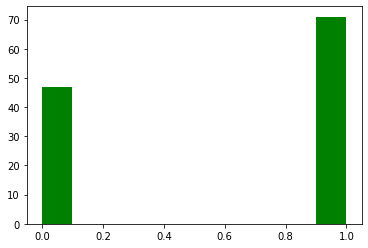

In [18]:
from fibrose_import import plt
plt.hist(x=fibrose_data.datadf['label'],  facecolor='green')
plt.show()

In [19]:
color=True
plt.rcParams['figure.figsize'] = (5, 5)
plt.subplots_adjust(wspace=0, hspace=0)
nrows,ncols=2,2

<Figure size 360x360 with 0 Axes>

1


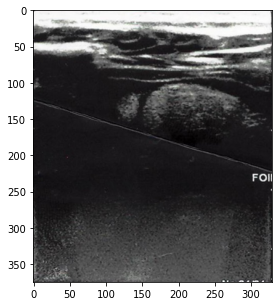

In [20]:
from fibrose_import import os,Image,np,torch
full_filenames = os.path.join(fibrose_data.datadf["path"].loc[65], fibrose_data.datadf["id"].loc[65])
img = Image.open(full_filenames)
img = img.resize((329,375))
if color is True:
    plt.imshow(np.array(img))
    print(fibrose_data.datadf["label"].loc[65])
else:
    plt.imshow(np.array(img)[:,:,0],cmap="gray")
    plt.axis('off')

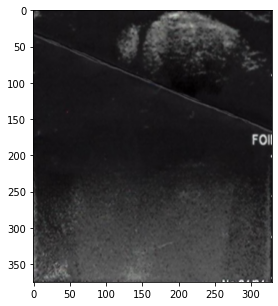

In [21]:
import torchvision.transforms as T
import matplotlib.pyplot as plt
from PIL import ImageFilter
w,h=img.size
img = img.crop((0, 100, w, h))
img = img.resize((329,375))
# crops=cropper(rs)
crops=img.filter(ImageFilter.SMOOTH_MORE)
plt.imshow(np.array(crops))


In [22]:
from fibrose_import import Callback,EarlyStopping
early_stop_callback = EarlyStopping(
   monitor='val_loss',
   patience=3,
   verbose=False,
   mode='min'
)

In [23]:
import torch
from torch.utils.data import Dataset
import pytorch_lightning as pl
import torchvision.transforms as transforms
import torchmetrics
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import torchvision.models as models
from torch.nn import functional as F
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
import os
class LitModel(pl.LightningModule):
    def __init__(self, input_shape, num_classes,model_name, learning_rate=1e-3):
        super().__init__()
        self.accuracy = torchmetrics.Accuracy()
        # log hyperparameters
        self.save_hyperparameters()
        self.learning_rate = learning_rate
        self.dim = input_shape
        self.num_classes = num_classes

        if model_name == "resnet":
            self.feature_extractor = models.resnet50(pretrained=True)
            self.feature_extractor.eval()
            layer4 = self.feature_extractor.layer4
            # self.feature_extractor.layer4 = nn.Sequential(
            #                              nn.Dropout(0.5),
            #                              layer4,
            #                              )
            for param in self.feature_extractor.parameters():
                param.requires_grad = False
        

        elif model_name == "vgg":
            self.feature_extractor = models.vgg16_bn(pretrained=True)
            self.feature_extractor.eval()
            for param in self.feature_extractor.parameters():
                param.requires_grad = False


        n_sizes = self._get_conv_output(input_shape)

        self.classifier = nn.Linear(n_sizes, num_classes)
    # returns the size of the output tensor going into Linear layer from the conv block.
    def _get_conv_output(self, shape):
        batch_size = 1
        input = torch.autograd.Variable(torch.rand(batch_size, *shape))

        output_feat = self._forward_features(input) 
        n_size = output_feat.data.view(batch_size, -1).size(1)
        return n_size
        
    # returns the feature tensor from the conv block
    def _forward_features(self, x):
        x = self.feature_extractor(x)
        return x
    
    # will be used during inference
    def forward(self, x):
       x = self._forward_features(x)
       x = x.view(x.size(0), -1)
       x = F.log_softmax(self.classifier(x),dim=1)
       
       return x

    # logic for a single training step
    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)
        
        # training metrics
        preds = torch.argmax(logits, dim=1)
        acc = self.accuracy(preds, y)
       
        return loss

    # logic for a single validation step
    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)

        # validation metrics
        preds = torch.argmax(logits, dim=1)
        acc = self.accuracy(preds, y)
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)
        return loss

    # logic for a single testing step
    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = F.nll_loss(logits, y)
        
        # validation metrics
        preds = torch.argmax(logits, dim=1)
        acc = self.accuracy(preds, y)
        self.log('test_loss', loss, prog_bar=True)
        self.log('test_acc', acc, prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer


In [24]:
transform = fibrose_import.transforms.Compose([
              fibrose_import.transforms.ToTensor()
        ])

In [25]:
mboupdata = fibrose_dataset.mboupDataset(fibrose_data.datadf,fibrose_data.data,transform)

In [26]:
img,label=mboupdata[70]

In [27]:
!cp "/content/drive/MyDrive/helpers_fonction.py" '.'

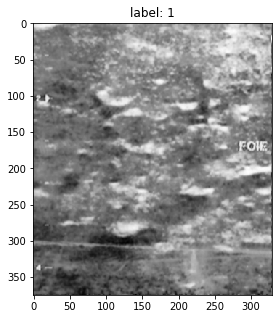

In [28]:
import helpers_fonction
plt.rcParams['figure.figsize'] = (5.0, 5.0)
helpers_fonction.show(img,label)

In [29]:
dm = fibrose_data_module.Caltech101DataModule(8,mboupdata)
# To access the x_dataloader we need to call prepare_data and setup.
dm.prepare_data()
dm.setup()

# Samples required by the custom ImagePredictionLogger callback to log image predictions.
val_samples = next(iter(dm.val_dataloader()))
val_imgs, val_labels = val_samples[0], val_samples[1]
val_imgs.shape, val_labels.shape

(torch.Size([8, 3, 329, 375]), torch.Size([8]))

In [30]:
from fibrose_logger import ImagePredictionLogger
from fibrose_import import pl
model = LitModel((3,329,375), 2,"resnet")
# Initialize a trainer
trainer = pl.Trainer(max_epochs=10,
                     progress_bar_refresh_rate=20, 
                     gpus=0, 
                     callbacks=[early_stop_callback,
                                ImagePredictionLogger(val_samples,8)])

trainer.fit(model, dm)
trainer.test(model=model, test_dataloaders=dm.test_dataloader())


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/callback_connector.py:91: LightningDeprecationWarning: Setting `Trainer(progress_bar_refresh_rate=20)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.progress.TQDMProgressBar` with `refresh_rate` directly to the Trainer's `callbacks` argument instead. Or, to disable the progress bar pass `enable_progress_bar = False` to the Trainer.
  f"Setting `Trainer(progress_bar_refresh_rate={progress_bar_refresh_rate})` is deprecated in v1.5 and"
GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1581: UserWarning: GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`.
  "GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`."
/usr/local/lib/python3.7/di

Validation sanity check: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/data_loading.py:413: UserWarning: The number of training samples (9) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  f"The number of training samples ({self.num_training_batches}) is smaller than the logging interval"


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:903: LightningDeprecationWarning: `trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6. Use `trainer.test(dataloaders)` instead.
  "`trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6."
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/datamodule.py:470: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  f"DataModule.{name} has already been called, so it will not be called again. "


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc': 0.6000000238418579, 'test_loss': 1.0853160619735718}
--------------------------------------------------------------------------------


[{'test_acc': 0.6000000238418579, 'test_loss': 1.0853160619735718}]

In [31]:
model

LitModel(
  (accuracy): Accuracy()
  (feature_extractor): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        

In [32]:
if torch.cuda.is_available():
  device = torch.device("cuda")
  model=model.to(device)

In [33]:
from torch import optim
optimizer = optim.Adam(model.parameters(),lr=1e-3)

In [34]:
from torchsummary import summary
summary(model,input_size=(3,329,375))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 165, 188]           9,408
       BatchNorm2d-2         [-1, 64, 165, 188]             128
              ReLU-3         [-1, 64, 165, 188]               0
         MaxPool2d-4           [-1, 64, 83, 94]               0
            Conv2d-5           [-1, 64, 83, 94]           4,096
       BatchNorm2d-6           [-1, 64, 83, 94]             128
              ReLU-7           [-1, 64, 83, 94]               0
            Conv2d-8           [-1, 64, 83, 94]          36,864
       BatchNorm2d-9           [-1, 64, 83, 94]             128
             ReLU-10           [-1, 64, 83, 94]               0
           Conv2d-11          [-1, 256, 83, 94]          16,384
      BatchNorm2d-12          [-1, 256, 83, 94]             512
           Conv2d-13          [-1, 256, 83, 94]          16,384
      BatchNorm2d-14          [-1, 256,

In [35]:
current_lr=helpers_fonction.get_lr(optimizer)
print('current lr={}'.format(current_lr))

current lr=0.001


In [36]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
# define learning rate scheduler
lr_scheduler = ReduceLROnPlateau(optimizer, mode='min',factor=0.2,patience=2,verbose=1)

In [37]:
weights_file = ''
weights_file = os.path.join(fibrose_data.path2weights,'weights.pt')
print(weights_file)

/content/drive/MyDrive/models/weights.pt


In [38]:
from fibrose_import import nn
loss_func = nn.NLLLoss()

In [39]:
params_train={
"num_epochs": 10,
"optimizer": optimizer,
"loss_func": loss_func,
"train_dl": dm.train_dataloader(),
"val_dl": dm.val_dataloader(),
"sanity_check": False,
"lr_scheduler": lr_scheduler,
"path2weights": weights_file,
}

In [46]:
# import copy
mod,loss_hist,metric_hist=helpers_fonction.train_val(model,params_train)

Epoch    21: reducing learning rate of group 0 to 3.2000e-07.
train loss: 0.022479, dev loss: 0.091115, accuracy: 78.26
----------
train loss: 0.037728, dev loss: 0.092816, accuracy: 73.91
----------
train loss: 0.039155, dev loss: 0.088063, accuracy: 78.26
----------
Epoch    24: reducing learning rate of group 0 to 6.4000e-08.
train loss: 0.025522, dev loss: 0.092524, accuracy: 78.26
----------
train loss: 0.026099, dev loss: 0.090884, accuracy: 78.26
----------
train loss: 0.028083, dev loss: 0.094901, accuracy: 73.91
----------
Epoch    27: reducing learning rate of group 0 to 1.2800e-08.
train loss: 0.031660, dev loss: 0.095677, accuracy: 78.26
----------
train loss: 0.026499, dev loss: 0.094394, accuracy: 73.91
----------
train loss: 0.026363, dev loss: 0.090456, accuracy: 73.91
----------
Epoch    30: reducing learning rate of group 0 to 2.5600e-09.
train loss: 0.031298, dev loss: 0.091636, accuracy: 73.91
----------


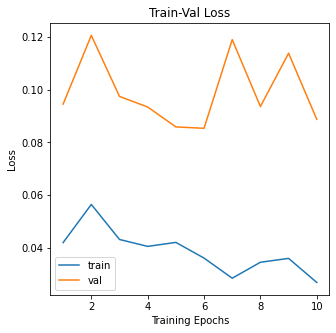

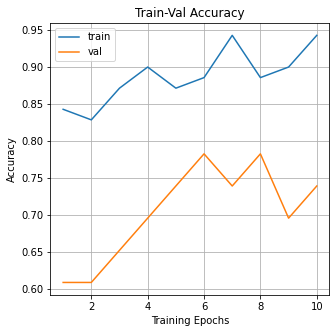

In [41]:
# Train-Validation Progress
num_epochs=params_train["num_epochs"]
# plot loss progress
plt.title("Train-Val Loss")
plt.plot(range(1,num_epochs+1),loss_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),loss_hist["val"],label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()
# plot accuracy progress
plt.title("Train-Val Accuracy")
plt.plot(range(1,num_epochs+1),metric_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),metric_hist["val"],label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.grid()
plt.show()

In [42]:
from fibrose_import import pd
y_pred_list=[]
y_true_list=[]
model.eval()  # it-disables-dropout
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in dm.test_dataloader():
        images, labels = images.cuda(), labels.cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_pred_list.append(predicted.cpu().numpy())
        y_true_list.append(labels.cpu().numpy())
        # print(predicted)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Test Accuracy of the model: {} %'.format(100 * correct / total))

labels_df=pd.DataFrame(np.concatenate(y_true_list),columns=["labels"])
labels_df["predicted"]=np.concatenate(y_pred_list)
labels_df.head(25)

Test Accuracy of the model: 52.0 %


,labels,predicted
0,1,0
1,0,0
2,1,1
3,1,1
4,0,1
5,1,0
6,0,0
7,0,1
8,1,0
9,0,1


In [43]:
y_pred_list = np.concatenate(y_pred_list)
y_true_list = np.concatenate(y_true_list)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true_list, y_pred_list))

              precision    recall  f1-score   support

           0       0.50      0.42      0.45        12
           1       0.53      0.62      0.57        13

    accuracy                           0.52        25
   macro avg       0.52      0.52      0.51        25
weighted avg       0.52      0.52      0.52        25



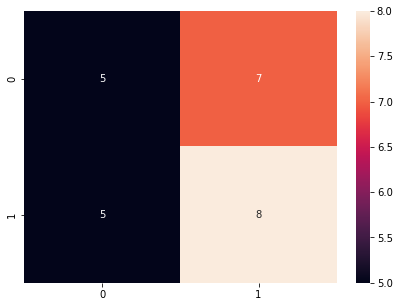

In [45]:
import seaborn as sns
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_true_list, y_pred_list))
fig, ax = plt.subplots(figsize=(7,5))         
sns.heatmap(confusion_matrix_df, annot=True, ax=ax)

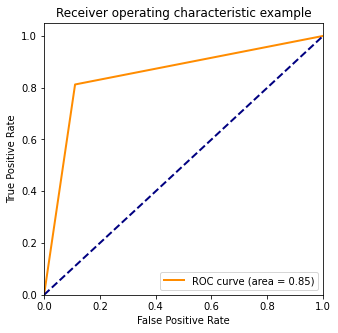

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, _ = roc_curve(y_true_list, y_pred_list)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()